In [ ]:
import sys
sys.path.append("..")  # Ensure project root is found

from configs.plot_config import apply_plot_settings
from configs.math_functions import F, lognormal, gaussian
from configs.parameters import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import os

C = float(os.getenv("C", C))
sig = float(os.getenv("sig", sig))
itr = int(os.getenv("itr", itr))

print(f"\n📢 Using parameters: C={C}, sig={sig}, itr={itr}")


📢 Using parameters: C=0.01, sig=0.1, itr=20000


In [2]:
# Apply global plot settings
apply_plot_settings()
plt.rcParams['legend.fontsize'] = 15

# Define the function to modify axis spines
def arrowed_spines(fig, ax):
    """Modify axis spines to include arrows."""
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # Removing default axis on all sides
    for side in ['bottom', 'right', 'top', 'left']:
        ax.spines[side].set_visible(False)

    # Remove y-ticks
    plt.yticks([])
    ax.yaxis.set_ticks_position('none')

    # Arrow properties
    hw = 1./30.*(ymax-ymin) 
    hl = 1./30.*(xmax-xmin)
    lw = 1.
    ohg = 0.3 

    # Draw x-axis arrow
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw=lw, 
             head_width=hw, head_length=hl, overhang=ohg, 
             length_includes_head=True, clip_on=False)

# **Ensure no previous figures interfere**
plt.close('all')

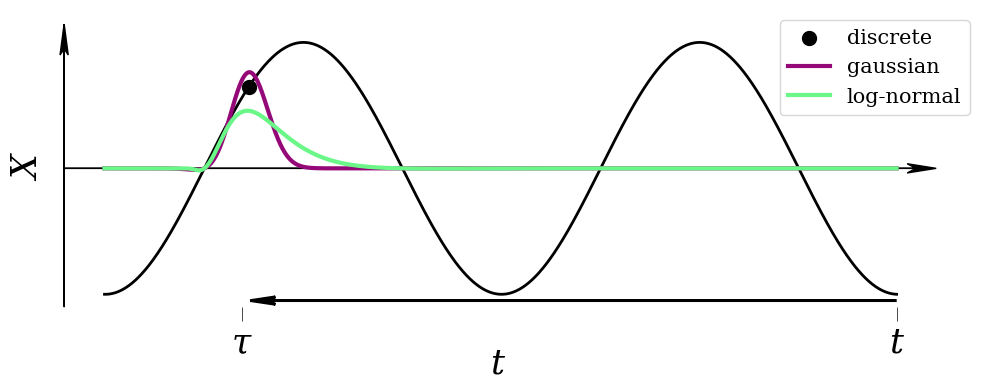

In [3]:
# Initialize figure and axes
fig, ax = plt.subplots(figsize=(10, 4))  # Explicitly define figure size

# Define x range
x = np.arange(4.7, 17.26, 0.01)

# Plot curves
ax.plot(x, np.sin(x), linewidth=2, color='black', zorder=1)
up = ax.scatter(6.985, np.sin(6.985), linewidth=5, color='black', zorder=10, label='discrete')
middle, = ax.plot(x, gaussian(x, 6.88, 0.32) * np.sin(x), linewidth=3, color='#950878', zorder=2, label='gaussian')
bottom, = ax.plot(x, lognorm.pdf(x, 0.5, 5.88) * np.sin(x), linewidth=3, color='#6af787', zorder=2, label='log-normal')

# Labels and figure settings
ax.set_xlabel("$t$", labelpad=-10)
ax.set_ylabel("$X$", labelpad=-20)
fig.set_facecolor('white')

# Modify axis spines
arrowed_spines(fig, ax)

# Add arrows
ax.arrow(4.06, -1.1, 0, 2.0, linewidth=1, facecolor='black', overhang=4.9, edgecolor='black', head_length=0.05, head_width=0.13)
ax.arrow(17.24, -1.05, -9.83, 0, linewidth=2, facecolor='black', overhang=0.3, edgecolor='black', head_length=0.4, head_width=0.06)

# Legend and ticks
ax.legend([up, middle, bottom], ["discrete", "gaussian", "log-normal"])
ax.set_xticks([6.88, 17.26])
ax.set_xticklabels([r'$\tau$', '$t$'])

# Save and show figure
plt.tight_layout()
plt.savefig("../figures/fig1.pdf", bbox_inches="tight")  # Save the figure in /figures/
plt.show()